# Datos anteriores

In [238]:
import pandas as pd

datos = pd.read_csv("data/datos.csv")
datos.sample(5)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
49245,35,0,27,8,12,1030,1.760813
46305,33,0,37,4,1,788,1.633477
28038,29,0,45,2,12,1200,1.652486
65634,43,0,41,2,12,1100,1.653088
62592,43,0,36,2,12,1500,1.740550


# Medidas de tendencia central

Son utilizadas para entender mejor donde las variables se concentran más.  
Las mas conocidas son:
- media ➡ promedio
- mediana
- moda

## DataFrame ejemplo

In [239]:
df = pd.DataFrame(
    data={
        "María": [8, 10, 4, 8, 6, 10, 8],
        "Pedro": [10, 2, 0.5, 1, 3, 9.5, 10],
        "Pablo": [7.5, 8, 7, 8, 8, 8.5, 7],
    },
    index=[
        "Matemática",
        "Portugués",
        "Inglés",
        "Geografía",
        "Historia",
        "Física",
        "Química",
    ],
)
df.rename_axis("Asignaturas", axis="columns", inplace=True)
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


# Media aritmética

Es representada por $\mu$ cuando se refiere a la población y por $\bar{X}$ cuando se refiere a la muestra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

donde

$n$ = número de observaciones (registros)

$X_i$ = valor de la i-ésima observación (registro)


> En resumen:
>
> La media aritmética es la suma de elementos dividido por la cantidad de elementos

<blockquote>
  <h3>🦉 En resumen:</h3>
  <p>La media es la suma de todos los elementos dividida en la cantidad de elementos</p>
</blockquote>

## Cálculo de media manual

In [240]:
# Calculando media
maria = df.María.values
promedio = round(sum(maria)/len(maria),2)
promedio

np.float64(7.71)

## Cálculo de media utilizando función `mean()`

In [241]:
# Función de python para calcular Media!
maria = df.María
maria.mean()

np.float64(7.714285714285714)

In [242]:
# Calcular media de los ingresos por sexo
datos.groupby(["Sexo"])["Ingreso"].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Ingreso, dtype: float64

# Mediana

Para obtener la mediana de un conjunto de datos, se debe proceder así:
1. Ordenar el conjunto de datos
2. Identificar el número de observaciones (registros) del conjunto de datos ($n$)
3. Identificar el elemento del medio:

> Cuando $n$ sea impar, la posición del elemento del medio se obtendrá de la siguiente manera:
> $$Elemento_{Md} = \frac{n+1}{2}$$
>
> Cuando $n$ sea par, la posición del elemento mediano se obtendrá de la siguiente manera:
> $$Elemento_{Md} = \frac{n}2$$

4. Obtener la mediana:

> Cuando $n$ sea impar:
> $$Md = X_{Elemento_{Md}}$$
> Cuando $n$ sea par:
> $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$

## Ejemplo 1 - n impar

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img002.png' width='40%' style="float:left">

In [243]:
maria = df.María
maria.mean()
maria = maria.sort_values()

maria.shape
n = maria.shape[0]
n

7

## Obteniendo mediana de impares de forma manual

In [244]:
# resetear index
maria = maria.reset_index()
maria

,index,María
0,Inglés,4
1,Historia,6
2,Matemática,8
3,Geografía,8
4,Química,8
5,Portugués,10
6,Física,10


In [245]:
# encontrar elemento central
elemento_md = (n+1)/2
elemento_md

4.0

In [246]:
maria.loc[elemento_md-1]

index    Geografía
María            8
Name: 3, dtype: object

## Obteniendo mediana de impares con función `median()` de python

Será necesario utilizar un DataFrame solo con una columna de números. En el caso del DF `maria`, habíamos transformado el index (de tipo texto con los nombres de las asignaturas) en columna.

In [247]:
maria['María'].median()

8.0

## Ejemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img003.png' width='50%' style="float:left">

In [248]:
# random_state es necesario para que el ejemplo de las notas sea igual al de la profe
pedro = df['Pedro'].sample(6, random_state=200)
pedro

Geografía      1.0
Física         9.5
Química       10.0
Historia       3.0
Matemática    10.0
Portugués      2.0
Name: Pedro, dtype: float64

In [249]:
pedro = pedro.sort_values()

In [250]:
n = pedro.shape[0]
n

6

In [251]:
pedro = pedro.reset_index()

In [252]:
pedro

,index,Pedro
0,Geografía,1.0
1,Portugués,2.0
2,Historia,3.0
3,Física,9.5
4,Química,10.0
5,Matemática,10.0


## Obtener mediana de pares manualmente

In [253]:
elemento_md = n/2
int(elemento_md)

3

In [254]:
(pedro.loc[elemento_md - 1][1] + pedro.loc[elemento_md][1])/2

/var/folders/45/nnwdvrcs63j3c_75jxv__q_80000gn/T/ipykernel_37365/3508535258.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (pedro.loc[elemento_md - 1][1] + pedro.loc[elemento_md][1])/2


np.float64(6.25)

In [255]:
pedro['Pedro'].median()

6.25

## Obtener mediana de pares con `median()`

In [256]:
datos.Ingreso.median()

1200.0

# Moda

La moda se puede definir como el valor más frecuente de un conjunto de datos. La moda es ampliamente utilizada para datos cualitativos.

In [257]:
# Obtener moda de DF ejemplo de notas
df.mode()

Asignaturas,María,Pedro,Pablo
0,8,10.0,8.0


In [258]:
# Ingreso más repetido de los entrevistados
datos.Ingreso.mode()

0    788
Name: Ingreso, dtype: int64

Ejemplo **multimodal**, no hay un valor único como moda:

In [259]:
datos.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

## Relación entre media, mediana y moda

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img004.png' width='80%'>

Importancia del histograma como opción para graficar representaciones de distribuciones de frecuencia.

1. Para que la relación sea simétrica:
    - media debe tener un valor muy cercano a la mediana y moda
2. Asimétrica a la derecha:
    - Moda es menor a la mediana
    - mediana es menor que la media
3. Asimétrica a la izquierda:
    - Media es menor a la mediana
    - Mediana es menor a la moda

### Verificando relación en Ingreso

/var/folders/45/nnwdvrcs63j3c_75jxv__q_80000gn/T/ipykernel_37365/875959450.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.query('Ingreso < 20000').Ingreso)


<Axes: xlabel='Ingreso', ylabel='Density'>

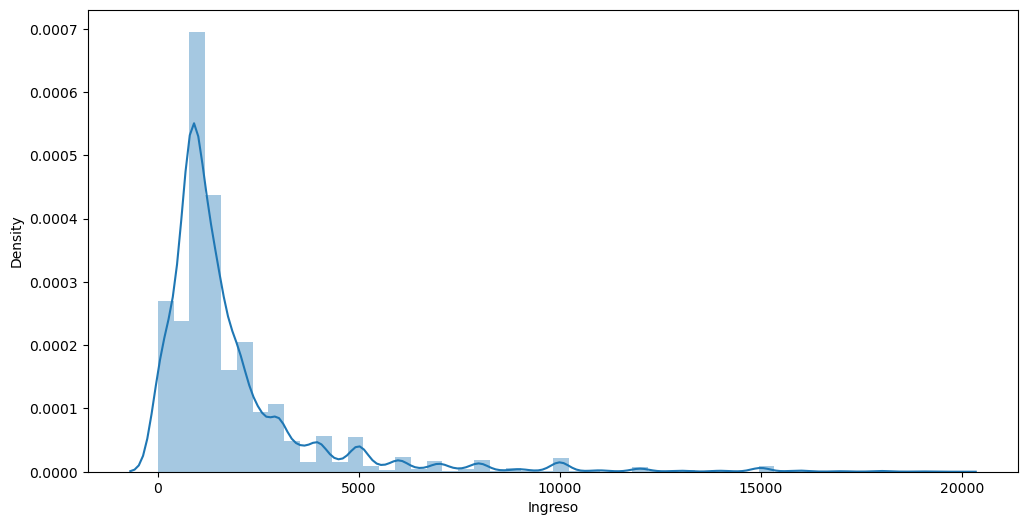

In [260]:
import seaborn as sns
ax = sns.distplot(datos.query('Ingreso < 20000').Ingreso)
ax.figure.set_size_inches(12,6)
ax

Solamente viendo el gráfico se puede apreciar que podría tener una relación asimétrica hacia la derecha. 
Pero se puede profundizar más:
- descubrir si la moda es mucho menor que la media

In [261]:
Moda = datos.Ingreso.mode()[0]
Moda

np.int64(788)

In [ ]:
Mediana = datos.Ingreso.median()
Mediana

1200.0

In [263]:
Media = datos.Ingreso.mean()
Media

np.float64(2000.3831988547631)

In [264]:
Moda < Mediana < Media

np.True_

### Verificando la relación en altura

/var/folders/45/nnwdvrcs63j3c_75jxv__q_80000gn/T/ipykernel_37365/2397976757.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura)


<Axes: xlabel='Altura', ylabel='Density'>

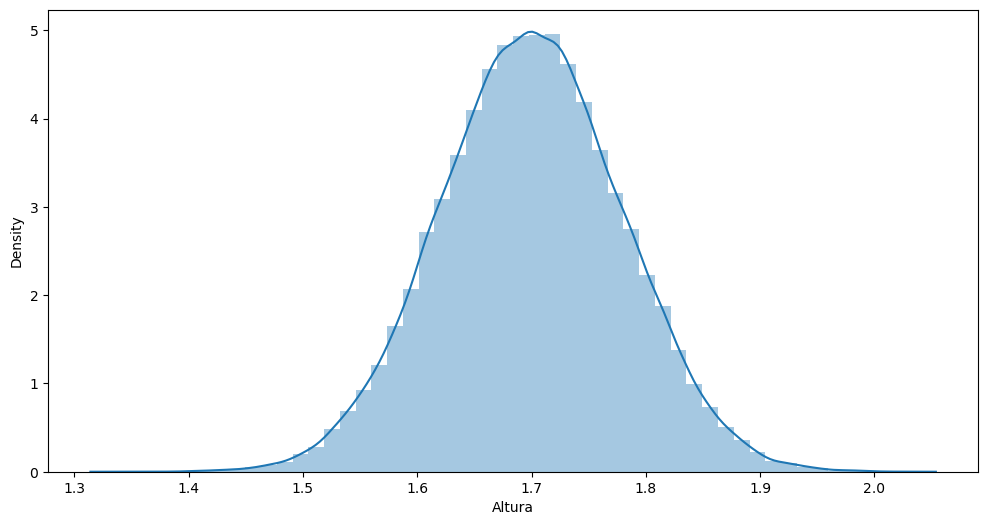

In [265]:
ax = sns.distplot(datos.Altura)
ax.figure.set_size_inches(12,6)
ax

In [266]:
Moda = datos.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [267]:
Media = datos.Altura.mean()
Media

np.float64(1.6995124540575741)

In [268]:
Mediana = datos.Altura.median()
Mediana

1.6993247325

### Verificando variable Años de estudio

/var/folders/45/nnwdvrcs63j3c_75jxv__q_80000gn/T/ipykernel_37365/2621572680.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos['Años de Estudio'], bins=17)


<Axes: xlabel='Años de Estudio', ylabel='Density'>

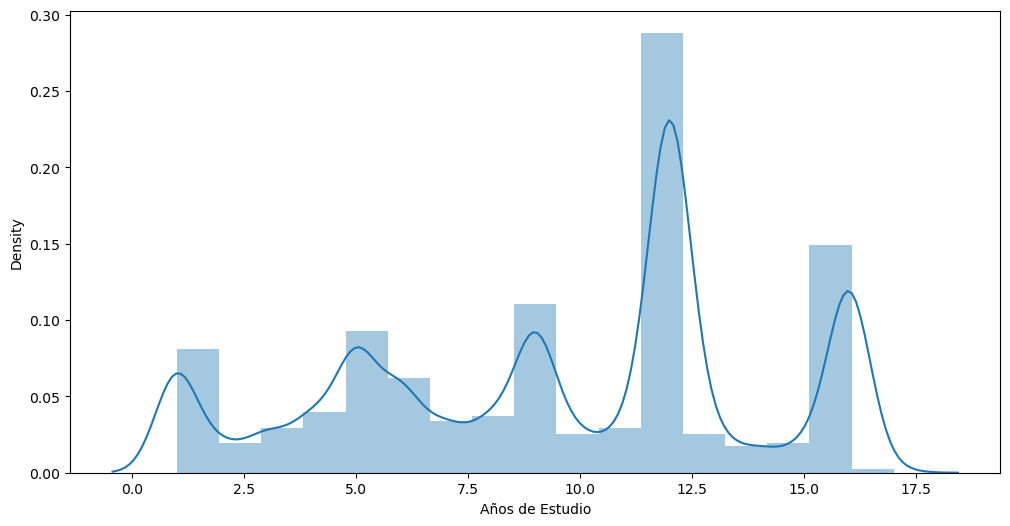

In [269]:
ax = sns.distplot(datos['Años de Estudio'], bins=17)
ax.figure.set_size_inches(12,6)
ax

In [270]:
Moda = datos['Años de Estudio'].mode()
Moda

0    12
Name: Años de Estudio, dtype: int64

In [271]:
Mediana = datos['Años de Estudio'].median()
Mediana

11.0

In [272]:
Media = datos['Años de Estudio'].mean()
Media

np.float64(9.469664237376367)

In [ ]:
# Comprobar si es asimétrico a la izquierda
Media < Mediana < Moda

0    True
Name: Años de Estudio, dtype: bool